## Vacancy Rates in Seattle, WA and What They Could Mean for Companies
Based on the dataset from Apartmentlist.com, it seems that vacancy is on the

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Read in data from "https://www.apartmentlist.com/research/category/data-rent-estimates" and do basic clean-up
apartment_data = "Resources/Apartment_List_Vacancy_Index_2023_01.csv"
apartment_df = pd.read_csv(apartment_data)
seattle_df = apartment_df.loc[apartment_df["location_name"] == "Seattle, WA"]
seattle_df

,location_name,location_type,location_fips_code,population,state,county,metro,2017_01,2017_02,2017_03,...,2022_04,2022_05,2022_06,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01
202,"Seattle, WA",City,5363000,741251,Washington,King County,"Seattle-Tacoma-Bellevue, WA",0.04295,0.043194,0.043135,...,0.060366,0.058095,0.054743,0.051956,0.05111,0.054013,0.058966,0.064128,0.068006,0.070712


In [3]:
# Change Vacancy Index to Percentage
vacancy_percent = (seattle_df.iloc[:, 7:81].values) * 100
vacancy_percent[0]

array([ 4.29504878,  4.31940801,  4.31354332,  4.34475365,  4.43738599,
        4.4945948 ,  4.61788467,  4.8398206 ,  5.14519357,  5.57601904,
        6.1773785 ,  6.70685266,  7.12752105,  7.39690417,  7.485738  ,
        7.46310043,  7.23632782,  6.97476194,  6.63631315,  6.35286716,
        6.29390225,  6.32173152,  6.33265056,  6.34339117,  6.39866157,
        6.33161555,  6.19030467,  5.9787892 ,  5.57944998,  5.24136724,
        4.99332831,  4.83195924,  4.82708294,  5.02701972,  5.24452309,
        5.41159056,  5.43911185,  5.12468384,  4.82494722,  4.87728954,
        5.30146559,  6.06850687,  6.96015943,  7.83351894,  8.65501727,
        9.51067659, 10.2343057 , 10.49384764, 10.24431386,  9.58659772,
        8.75164352,  7.83113175,  6.85011082,  5.88506739,  4.93934349,
        4.26897262,  4.10698995,  4.3287755 ,  4.88154425,  5.45751495,
        5.81695229,  6.00849531,  6.06391001,  6.03656114,  5.80950448,
        5.47425212,  5.19558508,  5.11100863,  5.40130873,  5.89

In [4]:
# Set x axis equal to values from seattle
x_axis = vacancy_percent[0]
labels = ["2017", "2018", "2019", "2020", "2021", "2022", "2023"]
starts = []

# Sort out how to display months rather than numbers

for i in range(7):
    starts.append(i * 12)


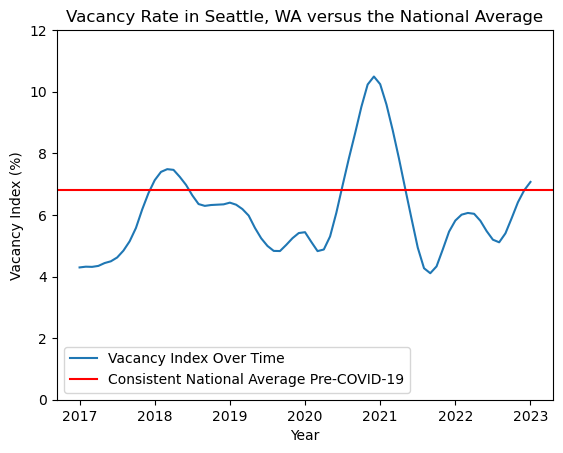

In [5]:
fig, ax = plt.subplots()

# Plot values
ax.plot(x_axis, label='Vacancy Index Over Time')
ax.axhline(y = 6.8, color = 'r', label='Consistent National Average Pre-COVID-19')

ax.set_xticks(starts)
ax.set_xticklabels(labels)

# Make things neater
plt.legend()
plt.title("Vacancy Rate in Seattle, WA versus the National Average")
plt.xlabel("Year")
plt.ylabel("Vacancy Index (%)")
plt.ylim(0, 12)
plt.savefig("Fig1-vacant")

# Vacancy Index Calculation
taken from https://www.apartmentlist.com/research/apartment-list-vacancy-index in the Methodology section
 
    "To calculate our vacancy index, we leverage the extensive dataset that powers our platform. Apartment List maintains robust data integrations with the properties that list with us, allowing us to track pricing and availability changes as soon as they occur. This not only creates a great experience for our users, but also gives us unique insight into trends in the rental market. For every property on our platform, we know the total number of units in the building, as well as the number that are vacant on any given day, allowing us to calculate a daily vacancy rate for each property in our sample. Our monthly vacancy index for a given location is calculated by taking an average of the daily vacancy rates for each property and then averaging the rates of all the properties that fall within the bounds of the given location (city, county, metro, state, or national), weighted by the number of units in each property..."

# Commercial Data

In [6]:
# Read in data found from "https://www.commercialedge.com/blog/national-office-report/"
commercial_data = "Resources/Commercial Construction Data.csv"
comm_df = pd.read_csv(commercial_data)
comm_df.head()

,Market,Dec-22 Listing Rate,Total Vacancy,"YTD Sales (Mil, as of 12/31)",YTD Sales Price PSF,Under Construction (Mil. SqFt)
0,San Francisco,$67.18,19.30%,2046,930,6.45
1,Seattle,$38.54,18.40%,2796,542,5.80
2,Denver,$29.87,18.30%,3017,296,2.61
3,Bay Area,$55.88,17.50%,4584,439,6.50
4,Portland,$30.46,17.30%,184,191,0.42


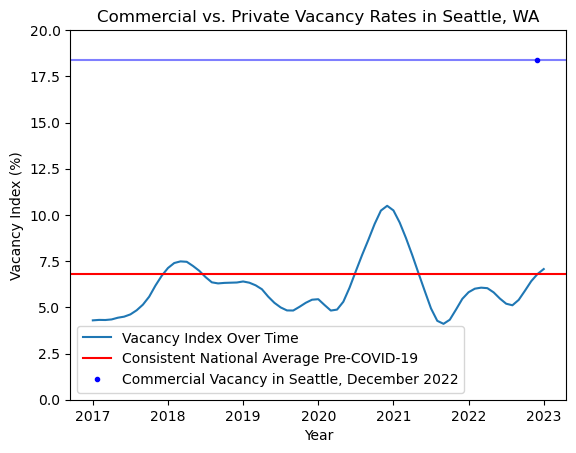

In [7]:
# Plot private rental vacancy vs commercial vacancy
fig, ax = plt.subplots()

# Plot values
ax.plot(x_axis, label='Vacancy Index Over Time')
ax.axhline(y = 6.8, color = 'r', label='Consistent National Average Pre-COVID-19')
ax.axhline(y = 18.4, color = 'b', alpha=0.5)
plt.plot(71, 18.4, '.', color = 'b', label='Commercial Vacancy in Seattle, December 2022')

ax.set_xticks(starts)
ax.set_xticklabels(labels)

# Make things neater
plt.legend()
plt.title("Commercial vs. Private Vacancy Rates in Seattle, WA")
plt.xlabel("Year")
plt.ylabel("Vacancy Index (%)")
plt.ylim(0, 20)
plt.savefig("Fig2-vacant")

# Get  Number of Residential Parcels vs. Commercial Parcels

https://geo.wa.gov/datasets/e8f2df3ed92843738f3dd778e92e93fc_0/explore?location=47.602128%2C-122.308183%2C13.93
- parcels in Seattle (186,461)

In [8]:
# Read in data, ignore warning as it works fine anyways
parcels = "Resources/Current_Parcels.csv"
parcels_df = pd.read_csv(parcels)
parcels_df.head()

C:\Users\Elizabeth\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,OBJECTID,FIPS_NR,COUNTY_NM,PARCEL_ID_NR,ORIG_PARCEL_ID,SITUS_ADDRESS,SUB_ADDRESS,SITUS_CITY_NM,SITUS_ZIP_NR,LANDUSE_CD,VALUE_LAND,VALUE_BLDG,DATA_LINK,FILE_DATE,GlobalID,SHAPE_Length,SHAPE_Area
0,731014,35,King,035-982920TRCT,982920TRCT,,NaN,SEATTLE,98122,0.0,NaN,NaN,https://blue.kingcounty.com/Assessor/eRealProp...,2022/02/07 00:00:00+00,{54F9202D-9DA1-4C01-A138-D5466612A681},197.347869,1502.805088
1,731015,35,King,035-982870TR-D,982870TR-D,,NaN,SEATTLE,98112,0.0,NaN,NaN,https://blue.kingcounty.com/Assessor/eRealProp...,2022/02/07 00:00:00+00,{95DD4C64-C756-4513-8197-1C1BB5A198B3},146.834493,634.218173
2,731016,35,King,035-9828701999,9828701999,,NaN,SEATTLE,98122,0.0,NaN,NaN,https://blue.kingcounty.com/Assessor/eRealProp...,2022/02/07 00:00:00+00,{05945A8F-C1CC-4A23-AD30-4FC4DE25B8A3},144.313486,741.994151
3,731017,35,King,035-9828701998,9828701998,,NaN,SEATTLE,98122,0.0,NaN,NaN,https://blue.kingcounty.com/Assessor/eRealProp...,2022/02/07 00:00:00+00,{E6BBD0F0-0814-424A-ACD5-6BB99C4DFB9E},144.313804,742.008840
4,731018,35,King,035-9828701997,9828701997,1828 26TH AVE,NaN,SEATTLE,98122,0.0,NaN,NaN,https://blue.kingcounty.com/Assessor/eRealProp...,2022/02/07 00:00:00+00,{83484916-A8FA-4B6C-A230-532DAC8759CF},144.473634,746.770398


In [9]:
# Get the specific Land Use code column 
parsed_df = parcels_df["LANDUSE_CD"]
parsed_df = pd.DataFrame(parsed_df)
values = parsed_df["LANDUSE_CD"].value_counts()
residential = 0
commercial = 0

# 11-19 are residential
# 61-69 are services such as real estate and theoretically are offices

# Add together all parcels with the land use code 11-19
for i in range(11, 20):
    try:
        residential += values[i]
    except KeyError:
        print(f"No parcels with the landuse designation: {i}")

# Add together all parcels with the land use code 61-69
for i in range(61, 70):
    try:
        commercial += values[i]
    except KeyError:
        print(f"No parcels with the landuse designation: {i}")

# Calculate an estimate of vacant parcels based on the reported vacancies of commercial/residential properties in December 2022
residential_vacant = round(residential * (x_axis[71] / 100))
commercial_vacant = round(commercial * 0.184)

print(residential_vacant)
print(commercial_vacant)
print(residential)
print(commercial)

No parcels with the landuse designation: 19
No parcels with the landuse designation: 62
No parcels with the landuse designation: 64
No parcels with the landuse designation: 66
No parcels with the landuse designation: 69
11428
441
168051
2397


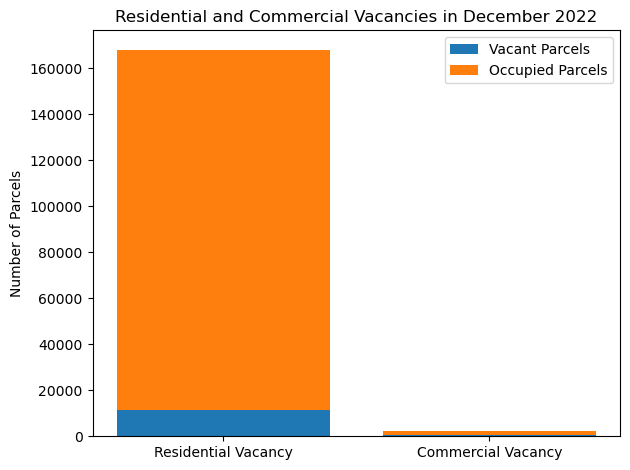

In [13]:
fig, ax = plt.subplots()

# Plot the total parcels in each category and the estimated number of parcels vacant in 2022
x_bars = [residential_vacant, commercial_vacant]
x_bars2 = [(residential - residential_vacant), (commercial - commercial_vacant)]
bar_labels = ["Residential Vacancy", "Commercial Vacancy"]
ax.bar(bar_labels, x_bars, label="Vacant Parcels")
ax.bar(bar_labels, x_bars2, bottom=x_bars, label="Occupied Parcels")
plt.title("Residential and Commercial Vacancies in December 2022")
plt.ylabel("Number of Parcels")
plt.legend()
plt.tight_layout()
plt.savefig("Fig3-vacant")